In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
login = pd.read_json('logins.json', convert_dates=True, encoding='ascii')

In [3]:
login.columns

Index(['login_time'], dtype='object')

In [4]:
login.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [5]:
df_rspl = login.resample(15min).count()
plt.figure(figsize=[20,15])
df_rspl.plot()
plt.title('login counts with frequency ' + freq)
plt.show()


In [6]:

login.set_index('login_time',inplace=True)

In [36]:
login['count'] = 1

<Figure size 3600x1440 with 0 Axes>

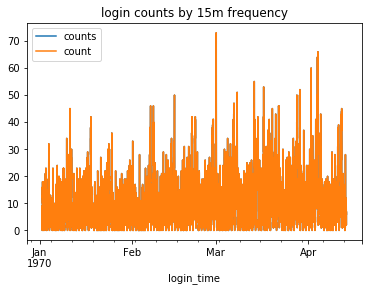

In [37]:
df_rspl = login.resample('15min', label='right').sum()
plt.figure(figsize=[50,20])
df_rspl.plot()
plt.title('login counts by 15m frequency')
plt.show()

In [38]:
df_rspl.head()

,counts,count
login_time,,
1970-01-01 20:15:00,2,2
1970-01-01 20:30:00,6,6
1970-01-01 20:45:00,9,9
1970-01-01 21:00:00,7,7
1970-01-01 21:15:00,1,1


In [39]:
df_rspl['time'] = pd.to_datetime(df_rspl.index)
print(type(df_rspl.time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [40]:
df_rspl['month'] = df_rspl.time.dt.month
df_rspl['day'] = df_rspl.time.dt.day
df_rspl['hour'] = df_rspl.time.dt.hour
df_rspl['week'] = df_rspl.time.dt.week
df_rspl['weekday'] = df_rspl.time.dt.weekday

In [41]:
# Group by month
print ('[Grouping by month]')
print (df_rspl.groupby('month')['count'].aggregate(np.sum))

[Grouping by month]
month
1    21225
2    24669
3    33727
4    13521
Name: count, dtype: int64


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

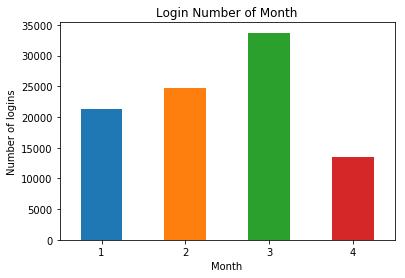

In [42]:
df_rspl.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [44]:
# Group by week
print ('[Grouping by week]')
print (df_rspl.groupby('week')['count'].aggregate(np.sum))

[Grouping by week]
week
1     2368
2     5218
3     5021
4     4750
5     4747
6     5564
7     5914
8     7038
9     6554
10    7400
11    7329
12    8959
13    7284
14    8096
15    6496
16     404
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

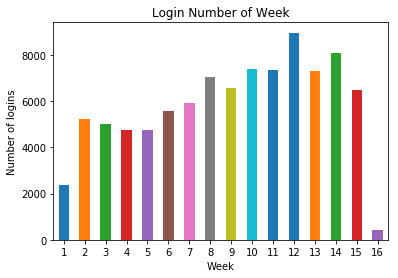

In [45]:
df_rspl.groupby('week')['count'].sum().plot(kind='bar')
plt.title("Login Number of Week")
plt.xlabel("Week")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [47]:
# Group by weekday
import calendar
nweek = 16   # total weeks 
print ('[Grouping by weekday]')
print (df_rspl.groupby('weekday')['count'].aggregate(np.sum)/nweek)

[Grouping by weekday]
weekday
0     553.0625
1     576.6250
2     642.6250
3     746.9375
4     947.0000
5    1214.6250
6    1140.5000
Name: count, dtype: float64


[Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

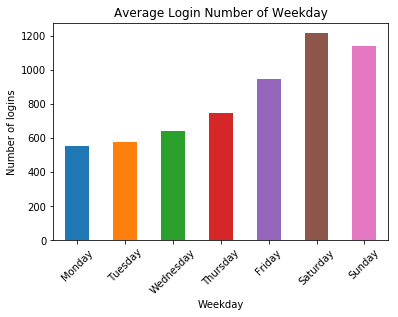

In [48]:
ax = (df_rspl.groupby('weekday')['count'].sum()/nweek).plot(kind='bar')
plt.title("Average Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

In [49]:
df_day = login.resample('D').sum()
df_day.head()

,counts,count
login_time,,
1970-01-01,112,112
1970-01-02,681,681
1970-01-03,793,793
1970-01-04,788,788
1970-01-05,459,459


In [50]:
df_day['date'] = pd.to_datetime(df_day.index)
df_day['weekday'] = df_day.date.dt.weekday
df_day.head()

,counts,count,date,weekday
login_time,,,,
1970-01-01,112,112,1970-01-01,3
1970-01-02,681,681,1970-01-02,4
1970-01-03,793,793,1970-01-03,5
1970-01-04,788,788,1970-01-04,6
1970-01-05,459,459,1970-01-05,0


[Text(0,0,'Monday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Friday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday')]

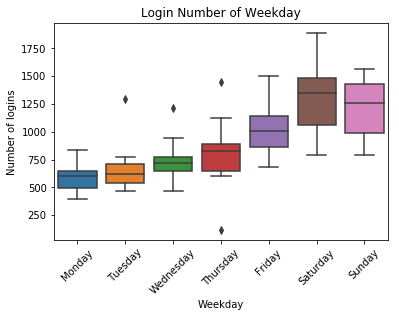

In [51]:
ax = sns.boxplot(x='weekday', y='count', data=df_day)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

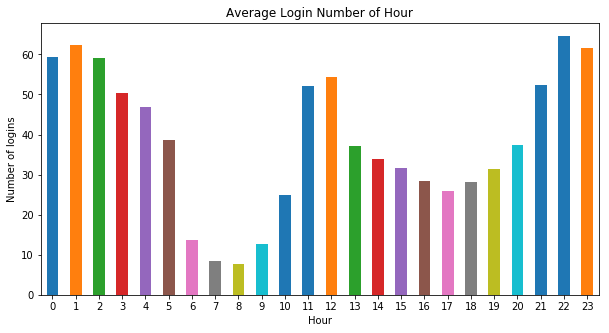

In [52]:
# Group by hour and plot for total days
nday = 30+28+30+13   # total days
(df_rspl.groupby('hour')['count'].sum()/nday).plot(kind='bar', figsize=(10,5))
plt.title("Average Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

In [ ]:
# We see peaks in early March and early April and weekly logins tend to increase gradually from Monday to Sat. 
""""
 Part 2
 1. I would consider a key measure of success in this experiment a statistically significant increase in drivers from Gotham 
 driving in Metropolis and vice versa.
 2. a) I would have to collect data about the drivers.  Drivers would have to be clearly labeled from Gotham or Metropolis.
       I would have to collect data about the driver's pick up or drop off location to track whether they switched cities.
    b) I could utilize z or t test to verify a statistically difference in the new program's effectiveness.
    c) I would observe the results after paying for the bridge toll.  If after testing for significance at 5% level and I 
    fail to reject the null hypothesis that the city / switch rate increased, then I would report that the toll payment
    was a failure.  If I got significance level of < 5% then I can reject the null hypothesis and state significance to the city.

""""

In [9]:
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)

data = pd.DataFrame(data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [53]:
data.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [16]:
data.last_trip_date.max()

'2014-07-01'

In [17]:
data.last_trip_date.min()

'2014-01-01'

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [56]:
# Fill in missing values with mean and then drop nulls
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)
data.dropna(axis=0, inplace=True)

In [58]:
df = data.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [59]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.65% of the observed users were retained.


In [81]:
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1

In [91]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [92]:
# Creating dummy variables for categorical features
ndf = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [93]:
X = ndf.drop('retained', axis=1)
y = ndf['retained']

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39683, 11)
(9921, 11)
(39683,)
(9921,)


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [100]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

# Using Random Forest Claasifier with default parameters, we can get a model with 75.7% accurac

[0.75897694 0.75255134 0.75897694 0.75796901 0.75198488]
Average 5-Fold CV Score: 0.7560918223448219


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [102]:
# Define function to get metrics of the model
def get_metrics(true_labels, predicted_labels):
    print ('Accuracy: ', accuracy_score(true_labels,predicted_labels))
    print (classification_report(true_labels, predicted_labels))

In [103]:
# Create the hyperparameter grid
n_options = [10,20,50,100,200]
feature_options = [5, 8, 10, 'auto', None]
oob_options = [True, False]
param_grid = {'n_estimators': n_options, 'max_features': feature_options, 'oob_score': oob_options}

In [104]:
# Instantiate the GridSearchCV object
clf_cv = GridSearchCV(clf, param_grid, cv=5)
# build model    
clf_cv.fit(X_train, y_train)
# predict using model
y_predict = clf_cv.predict(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].

In [105]:
# Print the optimal parameters and best score
print("Tuned Parameter: {}".format(clf_cv.best_params_))
print("Tuned Score: {}".format(clf_cv.best_score_))
print()
# evaluate model prediction performance 
print ('Test set performance:')
get_metrics(true_labels=y_test, predicted_labels=y_predict)

Tuned Parameter: {'max_features': 10, 'n_estimators': 200, 'oob_score': True}
Tuned Score: 0.7677846936975531

Test set performance:
Accuracy:  0.7625239391190404
             precision    recall  f1-score   support

          0       0.80      0.83      0.82      6290
          1       0.68      0.65      0.67      3631

avg / total       0.76      0.76      0.76      9921



In [106]:
rfc = RandomForestClassifier(n_estimators=100, max_features=8, oob_score=True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [108]:
# Generate classification report
print(classification_report(y_test, y_pred))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81      6290
          1       0.68      0.65      0.67      3631

avg / total       0.76      0.76      0.76      9921

Test set accuracy: 75.98%


In [109]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=range(0,2), columns=range(0,2))

,0,1
0,5166,1124
1,1259,2372


Text(0.5,1,'ROC Curve')

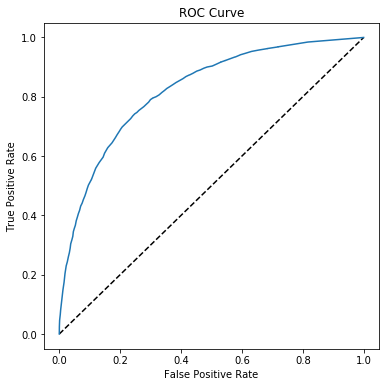

In [110]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [111]:
# Compute and print AUC score
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8223


In [112]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
0,avg_dist,0.298462
1,avg_rating_by_driver,0.147730
6,weekday_pct,0.114100
4,surge_pct,0.090977
2,avg_rating_of_driver,0.081041


In [ ]:
""""

From the importance of features, we find that the most important 3 features are:

avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
weekday_pct: the percent of the user’s trips occurring during a weekday
IV. Suggestions to Ultimate
To improve long-term rider retention, Ultimate need improve in the following aspects:

Attract riders to take longer trips during the first 30 days after signup.
Provide better service to get higher ratings from the riders.
Persuade riders to take trips during weekdays.


""""